# Author- Souvik Mitra

# TASK 1: PREDICTION USING SUPERVISED MACHINE LEARNING

# THE SPARKS FOUNDATION (GRIP): DATA SCIENCE AND BUSINESS ANALYTICS
In this regression task we will use the Python Scikit- Learn library for machine learning to implement regression functions. In this task, we will try to predict student's marks based on his/her hours of study. Since it is a simple task, so only two variables will be involved.

In [221]:
# importing necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [222]:
# Loading the dataset
df=pd.read_csv('data1.csv')

In [223]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [224]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


# Exploratory DATA Analysis

In [225]:
#Shape of dataset given
df.shape

(25, 2)

In [226]:
#columns in a dataset given
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [228]:
#statistical analysis of dataframe given
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [229]:
df['Scores']=df['Scores'].astype(float)

# Data Visualisation

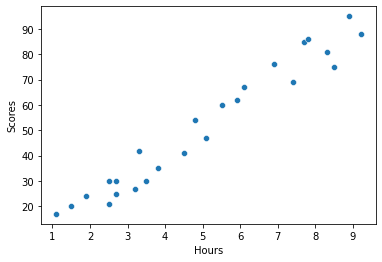

In [230]:
# plotting scores vs hours
sns.scatterplot(data=df,x='Hours',y='Scores')
plt.show()

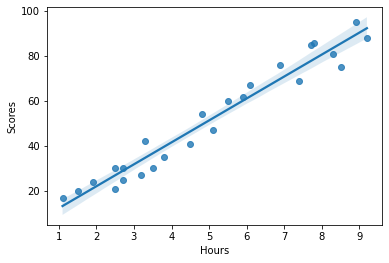

In [231]:
sns.regplot(data=df,x='Hours',y='Scores')
plt.show()

# Data Preprocessing

In [232]:
x=df['Hours']
y=df['Scores']

# Splitting the data into two sets 'training and testing'

In [233]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [234]:
x_train

23    6.9
14    1.1
1     5.1
10    7.7
13    3.3
8     8.3
6     9.2
18    6.1
4     3.5
9     2.7
7     5.5
20    2.7
3     8.5
0     2.5
21    4.8
15    8.9
12    4.5
Name: Hours, dtype: float64

In [235]:
x_test

5     1.5
2     3.2
19    7.4
16    2.5
11    5.9
22    3.8
17    1.9
24    7.8
Name: Hours, dtype: float64

In [236]:
y_train

23    76.0
14    17.0
1     47.0
10    85.0
13    42.0
8     81.0
6     88.0
18    67.0
4     30.0
9     25.0
7     60.0
20    30.0
3     75.0
0     21.0
21    54.0
15    95.0
12    41.0
Name: Scores, dtype: float64

In [237]:
y_test

5     20.0
2     27.0
19    69.0
16    30.0
11    62.0
22    35.0
17    24.0
24    86.0
Name: Scores, dtype: float64

# Training the model

In [238]:
from sklearn.linear_model import LinearRegression

In [239]:
model=LinearRegression()

In [240]:
model.fit(np.array(x_train).reshape(-1,1),y_train)
print('Training complete')

Training complete


# Plotting the Linear Regression line

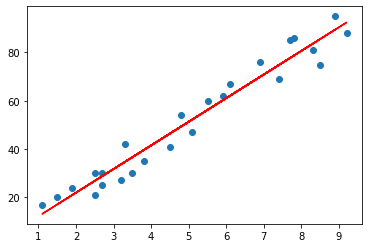

In [241]:
y_hat= model.coef_*x+model.intercept_

#Plotting for the test data
plt.scatter(x,y)
plt.plot(x, y_hat, color='red');
plt.show()

# Testing The Model

In [242]:
test_predictions=model.predict(np.array(x_test).reshape(-1,1))
test_predictions

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

In [243]:
#Comparing the Real Results with the Predicted One
df1=pd.DataFrame({'Actual':y_test, 'Predicted':test_predictions})
df1

,Actual,Predicted
5,20.0,17.053665
2,27.0,33.694229
19,69.0,74.806209
16,30.0,26.842232
11,62.0,60.123359
22,35.0,39.567369
17,24.0,20.969092
24,86.0,78.721636


##  Plotting scores for test data

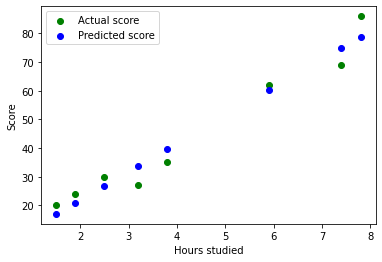

In [244]:
plt.scatter(x_test,y_test,color='g')
plt.scatter(x_test,test_predictions,color='b')
plt.legend(["Actual score",'Predicted score'])
plt.xlabel('Hours studied')
plt.ylabel('Score')
plt.show()

# Evaluating the performance of the model

In [214]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [215]:
mean_absolute_error(y_test,test_predictions)

4.419727808027651

In [216]:
np.sqrt(mean_squared_error(y_test,test_predictions))

4.7921912746363144

### Testing of score for given 9.25 hours of study

In [245]:
hours=9.25
test=np.array([hours])
test=test.reshape(-1,1)
predictions=model.predict(test)
print("Number of Hours Studied ={}".format(hours))
print("Predicted Score ={}".format(predictions[0]))

Number of Hours Studied =9.25
Predicted Score =92.91505723477056


# Conclusion
1.We have successfully created a Simple linear Regression model to predict score of the student given number of hours one studies.

2.We get a very less MAE and MSE of the model which means model is accurate.

3.We get Predicted Score as 92.91 when number of Hours Studied are 9.25 hours.